# Yelp restourant
In this progecte our goal is to define wht factors most affect a restaurant's Yelp rating
I will use muliple linear regression model on a real data set of yelp restaurant's

In [21]:
import zipfile
import os
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

## uploading and Exploring the data

In [22]:
with zipfile.ZipFile('/content/yelp_regression_project.zip','r') as zipref:
  zipref.extractall('/content/yelp')

In [23]:
df_business=pd.read_json('/content/yelp/yelp_regression_project/yelp_business.json',lines=True)

In [ ]:
df_business.info()

In [ ]:
df_business.describe()

In [ ]:
df_business.head()

In [27]:
df_checkin=pd.read_json('/content/yelp/yelp_regression_project/yelp_checkin.json',lines=True)

In [ ]:
df_checkin.info()

In [ ]:
df_checkin.describe()

In [30]:
df_data=pd.read_json('/content/yelp/yelp_regression_project/yelp_data.json',lines=True)

In [ ]:
df_data.info()

In [ ]:
df_data.describe()

In [33]:
df_photo=pd.read_json('/content/yelp/yelp_regression_project/yelp_photo.json',lines=True)

In [ ]:
df_photo.head()

In [ ]:
df_photo.info()

In [36]:
df_review=pd.read_json('/content/yelp/yelp_regression_project/yelp_review.json',lines=True)

In [ ]:
df_review.head()

In [ ]:
df_review.info()

In [39]:
df_tip=pd.read_json('/content/yelp/yelp_regression_project/yelp_tip.json',lines=True)

In [ ]:
df_tip.info()

In [ ]:
df_tip.head()

In [ ]:
df_data.columns

In [ ]:
df_business.columns

In [44]:
len(df_business)

188593

In [45]:
len(df_data)

188593

In [ ]:
df_data.head()

In [ ]:
df_business.head()

In [ ]:
df_data[df_data['attributes'].values!=df_business['attributes'].values]

In [49]:
df_business[:].equals(df_data[['address', 'alcohol?', 'attributes', 'business_id', 'categories',
       'city', 'good_for_kids', 'has_bike_parking', 'has_wifi', 'hours',
       'is_open', 'latitude', 'longitude', 'name', 'neighborhood',
       'postal_code', 'price_range', 'review_count', 'stars', 'state',
       'take_reservations', 'takes_credit_cards']])

True

We can see that the df_data and df_buisness are the same dataset

## Merging the data
Iner join is better cause it will remove the empty rows but seince we didn't decide with futers we will use i will use left join withe the left data set is the largest then i will stady the feutures and see what i need to remove later


In [50]:
len(df_data),len(df_review),len(df_checkin),len(df_tip),len(df_photo)

(188593, 188593, 157075, 121526, 32976)

In [51]:
len(df_data.columns),len(df_review.columns),len(df_checkin.columns),len(df_tip.columns),len(df_photo.columns)

(23, 7, 4, 3, 3)

In [ ]:
df=pd.merge(df_data,df_review,on='business_id')
df.info()

In [ ]:
df=pd.merge(df,df_checkin,on='business_id',how='left')
df.info(verbose=False)

In [ ]:
df=pd.merge(df,df_tip,on='business_id',how='left')
df.info(verbose=False)

In [ ]:
df=pd.merge(df,df_photo,on='business_id',how='left')
df.info(verbose=False)

## Preparing and cleaning the Data

Since our goal is what factors are most  affect the riting i will give more importance on the clining to the factor that my have an influace but others that i will probeblly remove them i will not do mutch on them to save time

In [ ]:
df.columns

In [ ]:
df.dtypes

In [58]:
len(df['address'].unique())

148815

In [59]:
print(df['attributes'][0].keys())

dict_keys(['BikeParking', 'BusinessAcceptsCreditCards', 'BusinessParking', 'GoodForKids', 'HasTV', 'NoiseLevel', 'OutdoorSeating', 'RestaurantsAttire', 'RestaurantsDelivery', 'RestaurantsGoodForGroups', 'RestaurantsPriceRange2', 'RestaurantsReservations', 'RestaurantsTakeOut'])


In [ ]:
df.columns

In [61]:
len(df.city.unique()) #maybe the city can affect the restaurant rating

1111

In [62]:
df.city.unique()

array(['Calgary', 'Henderson', 'Montréal', ..., 'Leslieville',
       'Parma mid birth', "O'hara Township"], dtype=object)

In [63]:
df.city.isnull().any()

np.False_

In [64]:
len(df['name'][df['name'].duplicated(keep=False)].unique())

11176

we have 11176 repeted name

In [ ]:
df[df.is_open==1]

we have 156606 open restaurant so i think i will focus on them cuas there is no to focus on closed restarant

In [ ]:
df.describe()

In [ ]:
df.isnull().any()

In [ ]:
(df.isnull().any())[df.isnull().any()==True]

In [ ]:
df['attributes'][0]


In [ ]:
df['attributes'][0]

In [ ]:
df.columns

most of variables on attribut is it in other columns in the table so i will remove it without messing alot of time on it but if i need more insight i can use it again

In [72]:
df1=df.drop('attributes',axis=1)

In [73]:
df1.categories[0].split(',')

['Tours', ' Breweries', ' Pizza', ' Restaurants', ' Food', ' Hotels & Travel']

In [74]:
for i in df1.categories:
  print(len(i.split(',')))
  break

6


In [75]:
print(pd.isna(df1['categories'][288]))

True


In [ ]:
df1['categories'][df.categories.isnull()==True]

In [77]:
import time

In [78]:
%%time
z=0
m=""
for i in range(len(df1.categories)):
  m=df1['categories'][i]
  if pd.isna(m):
    continue
  if z<len(m):
    z=len(m)
print(z,i)

550 188592
CPU times: user 924 ms, sys: 2 ms, total: 926 ms
Wall time: 932 ms


In [79]:
%%time
z=0
m=""
for i in range(len(df1.categories)):
  if pd.isna(df1['categories'][i]):
    continue
  if z<len(df1['categories'][i].split(',')):
    z=len(df1['categories'][i].split(','))
print(z,i)

37 188592
CPU times: user 1.72 s, sys: 7.14 ms, total: 1.72 s
Wall time: 1.73 s


In [ ]:
df1.iloc[188592]

i was just traing to see what are the categoris on this restaurant but i found beutie salons is mixed with the data 😧

In [ ]:
df1.categories.head()

In [82]:
restaurant_keywords = [
    'Restaurant', 'Food', 'Dining', 'Cafe', 'Bistro',
    'Bar', 'Pub', 'Eatery', 'Grill', 'Steakhouse',
    'Pizzeria', 'Bakery', 'Coffee', 'Tea', 'Breakfast',
    'Brunch', 'Lunch', 'Dinner', 'Buffet', 'Catering'
]

pattern = '|'.join(restaurant_keywords)


In [83]:
pattern

'Restaurant|Food|Dining|Cafe|Bistro|Bar|Pub|Eatery|Grill|Steakhouse|Pizzeria|Bakery|Coffee|Tea|Breakfast|Brunch|Lunch|Dinner|Buffet|Catering'

In [84]:
df1['is_restaurant'] = df1['categories'].str.contains(pattern, case=False, na=False)


In [ ]:
df1[df1['is_restaurant']==True]

so we have just 79931 from the  188593 that are real restaurants

In [ ]:
df2=df1[df1['is_restaurant']==True].copy()
df2.head()

In [ ]:
df1.head()

In [88]:
df2 = df2.reset_index()

In [ ]:
df2.columns

In [90]:
for i in range(len(df2.categories)):
  m=df2['categories'][i]
  if pd.isna(m):
    continue
  if z<len(m.split(',')):
    z=len(m.split(','))
print(z,i)

37 79930


In [91]:
df2.categories[79930]

'Mobile Phones, Shopping, Department Stores, Food, Fashion, Drugstores, Electronics, Grocery, Discount Store'

we have more mixed data supper marcket instad of restaurante

In [92]:
exclude_keywords = [
    'Grocery', 'Store', 'Shop', 'Market', 'Pharmacy',
    'Mobile', 'Insurance', 'Bank', 'Financial', 'Salon'
]

In [93]:
exclude_pattern = '|'.join(exclude_keywords)

In [94]:
df2['is_restaurant'] = (
    df2['categories'].str.contains(pattern, case=False, na=False) &
    ~df2['categories'].str.contains(exclude_pattern, case=False, na=False)
)

In [ ]:
df2[df2['is_restaurant']==True]

so we done with 69498 real restaurants

In [174]:
df3=df2[df2['is_restaurant']==True].copy()

In [ ]:
df3=df3.reset_index(drop=True)
df3.head()

In [176]:
for i in range(len(df3.categories)):
  m=df2['categories'][i]
  if pd.isna(m):
    continue
  if z<len(m.split(',')):
    z=len(m.split(','))
print(z,i)

37 69497


In [ ]:
df3.iloc[69497]

In [178]:
df3=df3.drop(['is_restaurant','index'],axis=1)

In [ ]:
df3.columns

In [ ]:
(df3.isnull().any())[df3.isnull().any()==True]

In [181]:
(df3.dtypes)[df3.dtypes=='object']

,0
address,object
business_id,object
categories,object
city,object
hours,object
name,object
neighborhood,object
postal_code,object
state,object
time,object


address will not help as, buisness_id alrady do the job of joining is the only job in this task, categories is a little missy i use it to choose only reastorant, city has a lot of values and i d'ont think it will be helpful alot, name hase no relation with the rithing mybe on the reputation but not on the riting we last with hours, neighvorhood , and time postal_code will not help state i will check

In [182]:
df3.time[0]

{'Fri-0': 1,
 'Sun-0': 3,
 'Thu-0': 1,
 'Fri-1': 1,
 'Fri-16': 1,
 'Tue-17': 1,
 'Sat-18': 1,
 'Tue-18': 2,
 'Wed-18': 1,
 'Fri-19': 2,
 'Thu-19': 2,
 'Sat-20': 3,
 'Thu-20': 1,
 'Tue-20': 1,
 'Sat-21': 2,
 'Tue-21': 1,
 'Fri-22': 1,
 'Sat-22': 1,
 'Thu-22': 1,
 'Fri-23': 1,
 'Sat-23': 1}

In [183]:
df3.weekday_checkins[0],df3.weekend_checkins[0]

(np.float64(11.0), np.float64(18.0))

In [184]:
df3.time[1]

{'Sun-1': 1}

In [185]:
df3.weekday_checkins[1],df3.weekend_checkins[1]

(np.float64(0.0), np.float64(1.0))

In [ ]:
df3.time[3]

In [187]:
df3.weekday_checkins[3],df3.weekend_checkins[3]

(np.float64(345.0), np.float64(440.0))

so we can see that the informations ot time are the same on  weekend and weekday so i can remove the time column also

In [188]:
len(df3.neighborhood.unique())

359

so we have 359 diffrent heighborhood info i will use this latter if i need more info but for now i will remove it

In [189]:
df3=df3.drop(['address',
'business_id',
'categories',
'city',
'hours',
'name',
'neighborhood',
'postal_code',
'state',
'time'],axis=1)

In [ ]:
df3.columns

In [191]:
(df3.isnull().any())[df3.isnull().any()==True]

,0
pic_count,True
weekday_checkins,True
weekend_checkins,True
average_tip_length,True
number_tips,True
average_caption_length,True
number_pics,True


this are numerical variables so no transformation needed but they have null values that we need to handl

In [192]:
df3.pic_count.isnull().sum()

np.int64(37895)

In [193]:
df3.pic_count.isnull().count()-df3.pic_count.isnull().sum()

np.int64(31603)

more than half of the information are not provided this column is probably not usful for as

In [194]:
0 in df3.pic_count.unique()

False

but since 0 is not in this cloumns i can say that non is a 0 inforamtion so i will riplice it by 0 for now

In [199]:
df3['pic_count']=df3.pic_count.fillna(0)

In [196]:
df3.weekday_checkins.isnull().sum()

np.int64(2853)

In [201]:
df3.weekend_checkins.isnull().sum()

np.int64(2853)

2053 is not a big problem when we have more than 60k row so i will also replace it by a 0 so the lack of info may mean we don't have it

In [197]:
df3['weekday_checkins']=df3.weekday_checkins.fillna(0)

In [202]:
df3['weekend_checkins']=df3.weekend_checkins.fillna(0)

In [200]:
df3.weekday_checkins.isnull().sum()

np.int64(0)

In [205]:
df3['average_tip_length'].isnull().sum()

np.int64(11273)

In [207]:
0 in df3['average_tip_length'].unique()

False

In [212]:
0 in df3['number_tips'].unique()

False

In [208]:
df3['average_tip_length']=df3.average_tip_length.fillna(0)

In [ ]:
df3['number_pics']

number pic and pic count are the same i will kape pic count

In [218]:
df3=df3.drop(['number_pics'],axis=1)

In [222]:
df3.average_caption_length.isnull().sum()

np.int64(37895)

In [226]:
0 in df3.average_caption_length.unique()


True

so this column is the half is missiog and when we have 0 is 0 not a missing value is better to remove this column

In [230]:
df3=df3.drop('average_caption_length',axis=1)

In [ ]:
df3.number_tips

In [236]:
df3.number_tips.isnull().sum()

np.int64(11273)

In [237]:
0 in df3.number_tips.isnull().unique()

True

In [238]:
df3.number_tips=df3.number_tips.fillna(df3.number_tips.median())

In [239]:
(df3.isnull().any())[df3.isnull().any()==True]

,0


In [ ]:
df3.columns

In [ ]:
df3.head()

In [ ]:
df3.dtypes

now that we clean our data and get rid of all missing data and duplications an all of non numirical columns we need to pass to feature enginiring

## Correlation Analysis and Feature Selection

In [253]:
df3.corr()

,is_open,latitude,longitude,review_count,stars,alcohol?,has_bike_parking,takes_credit_cards,good_for_kids,price_range,...,average_review_age,average_review_length,average_review_sentiment,number_funny_votes,number_cool_votes,number_useful_votes,weekday_checkins,weekend_checkins,average_tip_length,number_tips
is_open,1.000000,0.061969,0.066920,0.103147,0.032027,-0.076742,0.219612,-0.072171,0.025261,-0.075317,...,-0.575919,-0.238024,-0.092454,0.028107,0.066828,0.053997,0.085939,0.079079,0.046894,0.069277
latitude,0.061969,1.000000,0.498914,-0.171204,0.002798,0.006021,-0.054353,-0.256488,-0.067229,0.081794,...,-0.022461,0.112404,0.029111,-0.086879,-0.149757,-0.130169,-0.177605,-0.166565,-0.050440,-0.192192
longitude,0.066920,0.498914,1.000000,-0.183756,0.007923,-0.005911,-0.062695,-0.220473,-0.043820,0.035798,...,-0.047086,0.050910,-0.054894,-0.101162,-0.175993,-0.145027,-0.201175,-0.185798,-0.055848,-0.219246
review_count,0.103147,-0.171204,-0.183756,1.000000,0.105695,0.219548,0.157812,0.132921,0.084469,0.164707,...,-0.032522,0.033540,0.117795,0.478895,0.867024,0.713012,0.800901,0.851970,0.078376,0.888759
stars,0.032027,0.002798,0.007923,0.105695,1.000000,0.020725,0.123475,-0.043964,-0.068893,0.037260,...,-0.124084,-0.119632,0.736630,0.039426,0.119696,0.077828,0.072876,0.075081,0.002509,0.089433
alcohol?,-0.076742,0.006021,-0.005911,0.219548,0.020725,1.000000,0.150145,0.230634,0.069215,0.448843,...,0.111889,0.195691,0.146058,0.091134,0.155654,0.157079,0.132997,0.161051,0.087833,0.168618
has_bike_parking,0.219612,-0.054353,-0.062695,0.157812,0.123475,0.150145,1.000000,0.227471,0.136301,0.179939,...,-0.239454,-0.117601,0.104973,0.049077,0.105362,0.099441,0.130699,0.124055,0.152827,0.141700
takes_credit_cards,-0.072171,-0.256488,-0.220473,0.132921,-0.043964,0.230634,0.227471,1.000000,0.208999,0.332611,...,0.137505,-0.018744,0.018566,0.055012,0.096650,0.090815,0.111965,0.107450,0.123284,0.120151
good_for_kids,0.025261,-0.067229,-0.043820,0.084469,-0.068893,0.069215,0.136301,0.208999,1.000000,0.081744,...,-0.071419,-0.068237,-0.041765,0.012801,0.033419,0.033490,0.051549,0.039540,0.102936,0.078905
price_range,-0.075317,0.081794,0.035798,0.164707,0.037260,0.448843,0.179939,0.332611,0.081744,1.000000,...,0.102208,0.197175,0.136085,0.070175,0.126288,0.126492,0.078623,0.099494,0.106583,0.103252


In [257]:
df3.corr()['stars'].sort_values()

,stars
average_review_age,-0.124084
average_review_length,-0.119632
good_for_kids,-0.068893
takes_credit_cards,-0.043964
average_tip_length,0.002509
latitude,0.002798
longitude,0.007923
alcohol?,0.020725
is_open,0.032027
price_range,0.037260


average_rewiew_Sentiment is the most correlated with teh stars a positive corelation average_review_age 0.12 negative corelation average_review_length and has_bike_parking also 0.12 but positive corelation so this are the most corelated variables with our target


In [254]:
import matplotlib.pyplot as plt

[]

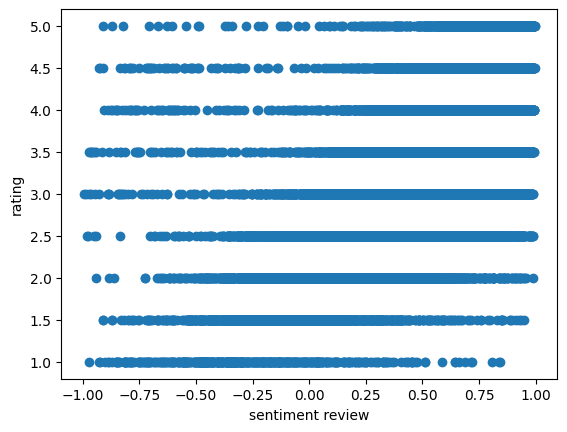

In [263]:
plt.scatter(df3['average_review_sentiment'],df3['stars'])
plt.xlabel('sentiment review')
plt.ylabel('rating')
plt.plot()

as the average sentiment review go ap the rating go with it

[]

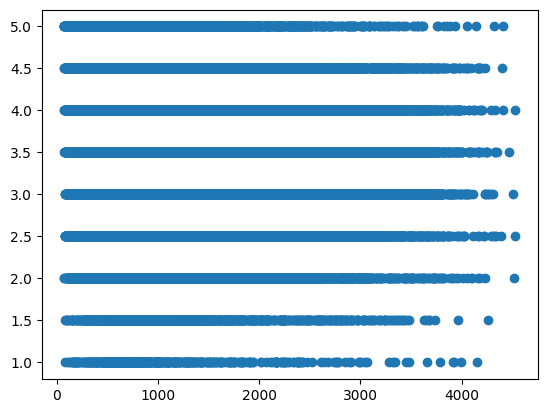

In [258]:
plt.scatter(df3['average_review_age'],df3['stars'])
plt.plot()

[]

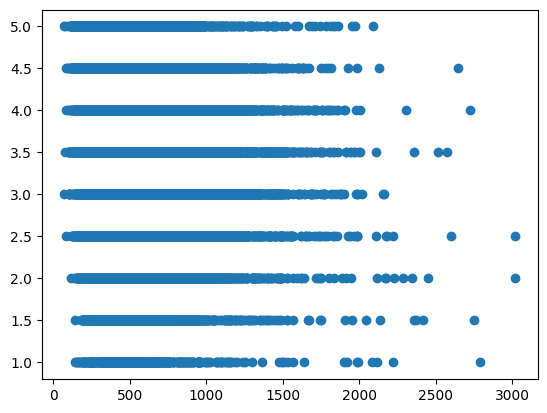

In [259]:
plt.scatter(df3['average_review_length'],df3['stars'])
plt.plot()

[]

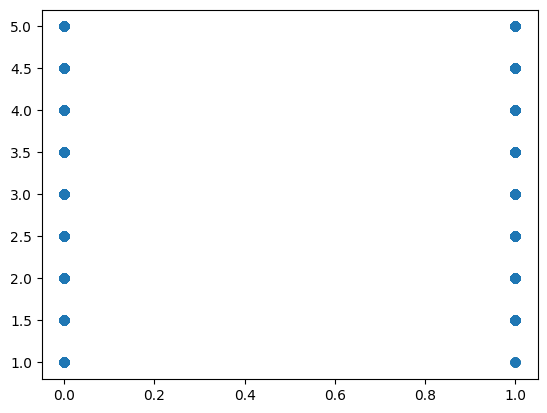

In [261]:
plt.scatter(df3['has_bike_parking'],df3.stars)
plt.plot()

doesn't affect rating

lets create some feutures that may be good

In [273]:
df3['bike_alcohol'] = df3['has_bike_parking'] * df3['alcohol?']
df3['wifi_credit'] = df3['has_wifi'] * df3['takes_credit_cards']
df3['review_engagement'] = df3['review_count'] * df3['pic_count']
df3['weekeday_reservation']=df3['weekday_checkins']*df3['take_reservations']

In [274]:
df3.corr()['stars'].sort_values()

,stars
average_review_age,-0.124084
average_review_length,-0.119632
good_for_kids,-0.068893
takes_credit_cards,-0.043964
average_tip_length,0.002509
latitude,0.002798
longitude,0.007923
review_engagement,0.017733
alcohol?,0.020725
wifi_credit,0.026496


In [276]:
df3.corr()['stars'].sort_values()

,stars
average_review_age,-0.124084
average_review_length,-0.119632
good_for_kids,-0.068893
takes_credit_cards,-0.043964
average_tip_length,0.002509
latitude,0.002798
longitude,0.007923
review_engagement,0.017733
alcohol?,0.020725
wifi_credit,0.026496


so i don't take that we can create a relly usfulle new features form thos so i will keep things like is it for now and see what i can do with what i have

features i will use: averag_reviex_sentiment,has_bike_parking,average_review_age,
average_review_length,
good_for_kids,
review_count

## Spliting the data

In [277]:
from sklearn.model_selection import train_test_split


In [279]:
X_train,X_test,y_train,y_test=train_test_split(df[['average_review_sentiment','has_bike_parking','average_review_age',
'average_review_length',
'good_for_kids',
'review_count']],df['stars'],test_size=0.2,random_state=42)

now after spliting it will be good if we standardiz this since we have a huge diffrence between features

In [283]:
X_train.head()

,average_review_sentiment,has_bike_parking,average_review_age,average_review_length,good_for_kids,review_count
172576,0.477989,0,2199.189189,1134.432432,1,37
114539,0.742079,1,1188.868421,336.500000,1,77
37935,0.073925,1,950.625000,666.062500,0,16
25173,0.671650,0,1924.500000,851.250000,0,8
10972,0.265067,1,767.000000,385.000000,0,3


In [282]:
from sklearn.preprocessing import StandardScaler

In [286]:
scaler = StandardScaler()

X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

col = ['average_review_sentiment','average_review_age','average_review_length','review_count']
X_train_scaled[col] = scaler.fit_transform(X_train[col])
X_test_scaled[col] = scaler.transform(X_test[col])

In [290]:
X_test_scaled.head()

,average_review_sentiment,has_bike_parking,average_review_age,average_review_length,good_for_kids,review_count
77388,-1.032857,0,-0.558034,0.100450,0,0.126219
160447,0.290404,1,0.302262,-0.265218,1,0.736712
88752,1.036029,0,-1.314852,-0.943727,0,-0.198106
128235,-0.509582,1,0.497146,-0.708370,1,0.021290
150566,0.947213,1,0.401485,-0.992217,0,-0.255340


## Training the model

In [291]:
from sklearn.linear_model import LinearRegression

In [292]:
model=LinearRegression()

In [293]:
model.fit(X_train_scaled,y_train)

LinearRegression()

In [ ]:
#['average_review_sentiment','has_bike_parking','average_review_age','average_review_length','good_for_kids','review_count']

In [296]:
model.coef_

array([ 0.78549916, -0.07589845, -0.09429314, -0.17008972, -0.19492667,
       -0.00476118])

In [297]:
model.intercept_

np.float64(3.711412847640503)

In [298]:
prediction=model.predict(X_test_scaled)

In [303]:
model.score(X_train_scaled,y_train)

0.6617882020489311

In [302]:
model.score(X_test_scaled,y_test)

0.661189683454438

changing the features for the model

In [310]:
X_train1,X_test1,y_train1,y_test1=train_test_split(df[['average_review_sentiment','average_review_age',
'average_review_length','review_count']],df['stars'],test_size=0.2,random_state=42)

In [311]:
scaler11 = StandardScaler()

X_train_scaled1 = X_train1.copy()
X_test_scaled1 = X_test1.copy()

col = ['average_review_sentiment','average_review_age','average_review_length','review_count']
X_train_scaled1[col] = scaler11.fit_transform(X_train1[col])
X_test_scaled1[col] = scaler11.transform(X_test1[col])

In [304]:
model1=LinearRegression()

In [312]:
model1.fit(X_train_scaled1,y_train1)

LinearRegression()

In [314]:
model1.score(X_train_scaled1,y_train1)

0.6520574965108212

In [315]:
model1.score(X_test_scaled1,y_test1)

0.6524941554294895

In [316]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [317]:
import numpy as np

for the first  model

In [318]:
r2 = r2_score(y_test, prediction)
r2

0.661189683454438

In [319]:
rmse = np.sqrt(mean_squared_error(y_test,  prediction))
rmse

np.float64(0.5894201376395477)

In [320]:
mae = mean_absolute_error(y_test,  prediction)
mae

0.44567839204310267

And this is the result for this work the best way to prediction the stars is has_bike_parking,average_review_age,average_review_length,good_for_kids,review_count


conclusion:
---
**This model can predicted with 0.6 accuarcy the ration of a restaurant based on pramerly the review sentiment analysis gode for kids and review recency and other fuetures**
